In [1]:
from keras.engine.input_layer import InputLayer
from keras.engine.saving import pickle_model
import numpy as np
import cv2
import os
# from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Activation

import pickle

Using TensorFlow backend.


In [2]:
path = "Dataset"
testRadio = 0.2
valRadio = 0.2
imageDimensions = (32,32,3)

batchSizeVal = 128
epochsVal = 30
stepsPerEpoch = 2000

In [3]:
classNo = []
image = []
myList = os.listdir(path)
# print(myList)
noOfClasses = len(myList)

for x in myList:
    myPiclist = os.listdir(path+"/"+str(x))
    for y in myPiclist:
        # img = (path+"/"+str(x)+"/"+y)
        curImg = cv2.imread(path+"/"+str(x)+"/"+str(y))
        curImg = cv2.resize(curImg,(imageDimensions[0],imageDimensions[1]))
        image.append(curImg)
        classNo.append(x)
    print(x, end=' ')
print(' ')

0 1 10 11 12 13 14 15 16 17 18 19 2 20 21 22 23 24 25 26 27 28 29 3 30 31 32 33 34 35 36 37 38 39 4 40 41 42 43 44 45 46 47 48 49 5 50 51 52 53 54 55 56 57 58 59 6 60 61 62 7 8 9  


In [14]:
image = np.array(image)
classNo = np.array(classNo)

print(image.shape)

(105840, 32, 32, 3)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(image,classNo,test_size=testRadio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRadio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(67737, 32, 32, 3)
(21168, 32, 32, 3)
(16935, 32, 32, 3)


In [16]:
numOfSamples = []
for x in myList:
    numOfSamples.append(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_test==x)[0]))
print(numOfSamples)

[1115, 313, 1067, 333, 1092, 334, 1042, 377, 1065, 349, 1065, 327, 1091, 324, 1110, 314, 1093, 334, 1082, 330, 1058, 325, 1092, 347, 1093, 326, 1076, 329, 1087, 329, 1057, 334, 1043, 378, 1063, 352, 1084, 325, 1106, 326, 1051, 347, 1086, 334, 1087, 331, 1109, 317, 1097, 336, 1094, 321, 1061, 339, 1044, 354, 1083, 309, 1083, 346, 1056, 334, 1068, 352, 1053, 343, 1074, 341, 1075, 335, 1071, 348, 1062, 347, 1027, 356, 1083, 315, 1075, 332, 1076, 336, 1021, 342, 1068, 334, 1044, 376, 1078, 346, 1107, 313, 1113, 317, 1070, 333, 1055, 337, 1093, 320, 1107, 298, 1057, 352, 1059, 357, 1080, 355, 1084, 331, 1071, 336, 1073, 346, 1088, 325, 1081, 331, 1045, 346, 1071, 345, 1083, 348, 1093, 301]


In [ ]:
plt.figure(figsize=(10,5))
plt.bar(myList,numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [18]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
    
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))
X_validation = np.array(list(map(preProcessing, X_validation)))

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

dataGen.fit(X_train)


In [19]:
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

print(X_train)
print(X_test)
print(X_validation)

[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

In [20]:
def myModel():
    noOfFilter = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500

    model = Sequential()
    model.add((Conv2D(noOfFilter,sizeOfFilter1,input_shape=(imageDimensions[0],
                                                            imageDimensions[1],1),
                                                            activation='relu')))

    model.add((Conv2D(noOfFilter,sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Conv2D(noOfFilter//2, sizeOfFilter2, activation='relu'))
    model.add(Conv2D(noOfFilter//2, sizeOfFilter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))

    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model = myModel()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 30)         

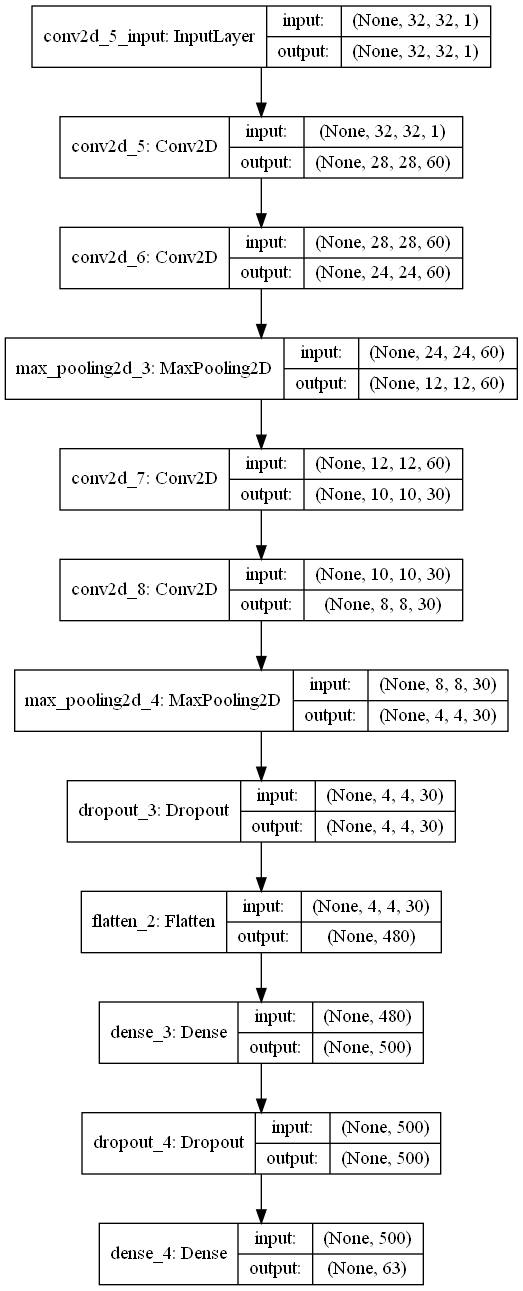

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

In [22]:
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('trained/CNN_30epoch_2000step_Batch128.h5')


In [40]:
model.evaluate(X_test,y_test)

21168/21168 [==============================] - 38s 2ms/step


[0.07180407026237777, 0.9780800938606262]

Epoch 1/30
2000/2000 [==============================] - 1937s 969ms/step - loss: 0.2858 - accuracy: 0.9064 - val_loss: 0.0740 - val_accuracy: 0.9764
Epoch 2/30
2000/2000 [==============================] - 1905s 953ms/step - loss: 0.2821 - accuracy: 0.9070 - val_loss: 0.0738 - val_accuracy: 0.9776
Epoch 3/30
2000/2000 [==============================] - 1905s 952ms/step - loss: 0.2803 - accuracy: 0.9084 - val_loss: 0.0793 - val_accuracy: 0.9735
Epoch 4/30
2000/2000 [==============================] - 1902s 951ms/step - loss: 0.2775 - accuracy: 0.9094 - val_loss: 0.0745 - val_accuracy: 0.9757
Epoch 5/30
2000/2000 [==============================] - 1842s 921ms/step - loss: 0.2770 - accuracy: 0.9086 - val_loss: 0.0749 - val_accuracy: 0.9747
Epoch 6/30
2000/2000 [==============================] - 1787s 894ms/step - loss: 0.2769 - accuracy: 0.9104 - val_loss: 0.0734 - val_accuracy: 0.9757
Epoch 7/30
2000/2000 [==============================] - 1786s 893ms/step - loss: 0.2734 - accuracy: 0.9104

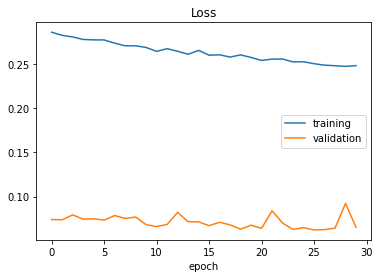

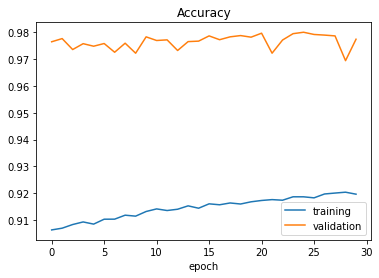

Test Score = 0.06417816966361678
Test Accuracy = 0.9776077270507812


In [23]:
history = model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchSizeVal),
                                 steps_per_epoch=stepsPerEpoch,
                                 epochs=epochsVal,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score =', score[0])
print('Test Accuracy =', score[1])

In [24]:
model.save('trained/CNN_30epoch_2000step_Batch128_3.h5')

In [25]:
model.evaluate(X_test,y_test)

21168/21168 [==============================] - 54s 3ms/step


[0.06417816966361678, 0.9776077270507812]

In [15]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[2.6565158e-17, 2.3352877e-26, 4.8135349e-27, 2.7789018e-24,
        3.6604228e-19, 1.6940304e-16, 1.0000000e+00, 9.4534554e-29,
        6.0836760e-18, 5.3253165e-26, 0.0000000e+00],
       [3.8908304e-11, 9.9999893e-01, 1.2225767e-08, 2.0081878e-10,
        2.0814449e-10, 5.7537026e-13, 2.7282026e-13, 1.0295012e-06,
        8.1761003e-13, 1.2608827e-12, 3.4487008e-23],
       [7.1961055e-25, 4.1436316e-17, 1.7438119e-20, 6.2851738e-27,
        1.0000000e+00, 4.4294320e-27, 2.0025322e-22, 1.7744692e-23,
        9.4146389e-26, 7.4045167e-23, 0.0000000e+00],
       [1.4283228e-06, 3.8059973e-09, 7.8434423e-05, 5.0009479e-05,
        6.5471937e-07, 1.4266495e-06, 2.9655782e-09, 1.6550932e-07,
        5.9587933e-04, 9.9927205e-01, 1.3869451e-14],
       [1.5904460e-14, 1.6119424e-11, 3.4334607e-10, 9.9999797e-01,
        4.6336074e-13, 2.0096729e-06, 3.8327645e-14, 2.4803734e-11,
        1.4486916e-11, 3.5159438e-13, 4.2432291e-25]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 1, 4, 9, 3]

In [17]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
myList[y_classes[45]]

'0E81'

*Test Model*

In [101]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [128]:
filename = input("Enter image filename (with extension)\n")

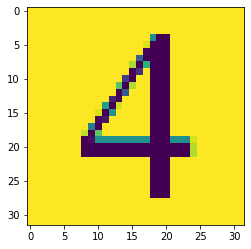

In [129]:
img = cv2.resize(plt.imread(filename),(32,32))
plt.imshow(img)

In [130]:
from keras.models import load_model
model = load_model('trained/CNN_30epoch_2000step_Batch100.h5')
img.shape
img.reshape(32,32,4)

ValueError: cannot reshape array of size 1024 into shape (32,32,4)

In [118]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [119]:
img_grayscale = rgb2gray(img).reshape(1,32,32,1)
img_grayscale.shape

(1, 32, 32, 1)

In [120]:
pred = model.predict(img_grayscale)
import int_to_text
print("Prediction: ", int_to_text.image_to_string(np.argmax(pred)),"\n Confidence: ", pred[0,np.argmax(pred)])

Prediction:  ກ 
 Confidence:  1.0
